In [1]:
from IPython.display import display, Math, Latex, HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''') 

<img src="images/pi.png" width="200"/>
<center> https://www.pcworld.com/article/191389/a-brief-history-of-pi.html</center>

<img style="float: left;" src="images/pi_calculation.png" width="400"/>

<img style="float: right;" src="images/William.png" width="300"/>

$\pi$ is **the circumference  divided by the diameter  of a circle**. 

It's believed that human civilizations were aware of pi [as early as 2550 BC](https://www.pcworld.com/article/191389/a-brief-history-of-pi.html).

The symbol for Pi  was introduced by **William Jones** in 1706.
Before being ascribed a modern name, pi was known as "quantitas in quam cum multiflicetur diameter, proveniet circumferencia" — Latin for “the quantity which, when the diameter is multiplied by it, yields the circumference.”

**Pi is an irrational number - its  digits never end or repeat in any known way.** 
   
(Image sources https://www.mathsisfun.com/numbers/pi.html, https://www.historytoday.com/archive/william-jones-and-his-circle-man-who-invented-pi)


In [2]:
import ipywidgets as widgets
from IPython.display import display, Markdown, Latex,Math, HTML, clear_output, Javascript

In [3]:
digit_answers=[1,4,1,5,9,2,6,5,3,5,8,9,7,9,3,2,3,8,4,6,2,6,4,3,3,8,3,2,7,9,5,0,2,8,8,4,1,9,7,1]
current_position=0
number_of_mistakes=5
number_of_mistakes_left=number_of_mistakes

digit_widgets=[]
for i in range(35):
    digit_widgets.append(widgets.Text(value='',disabled=True,layout=widgets.Layout(width='3%')))
pi_real=widgets.HTMLMath(value="$$\pi=3.$$")
next_number=widgets.HTML(value="Enter the next digit:")
answer_text=widgets.Text(value='',disabled=False,layout=widgets.Layout(width='3%'))
check_button=widgets.Button(description='Check',button_style='info',disabled=False)
warning=widgets.HTML(value="")
mistakes=widgets.HTML(value="Mistakes left: <font color='red'>"+str(number_of_mistakes_left)+"</font>")
reset_button=widgets.Button(description='Reset',disabled=False)

def on_button_clicked(b):
    global current_position,number_of_mistakes_left
    answer_text.value=answer_text.value.replace(" ", "")
    if answer_text.value in ['0','1','2','3','4','5','6','7','8','9']:
        if answer_text.value == str(digit_answers[current_position]):
            digit_widgets[current_position].value=answer_text.value
            current_position=current_position+1
            warning.value="<font color='green'> Correct! </font>"
        else:
            warning.value="<font color='red'> Not quite... </font>"
            number_of_mistakes_left=number_of_mistakes_left-1
            mistakes.value="Mistakes left: <font color='red'>"+str(number_of_mistakes_left)+"</font>"
        if number_of_mistakes_left==0 or current_position==40:
            b.disabled=True
            answer_text.disabled=True
            for i in range(35):
                digit_widgets[i].value=str(digit_answers[i])
            warning.value="<font color='red'> Game over! You scored "+str(current_position)+"! Press Reset button to start again </font>"
    else:
        warning.value="Please enter number from zero to 9"
    answer_text.value=''

check_button.on_click(on_button_clicked)

def on_button_reset_clicked(b):
    global current_position,number_of_mistakes_left
    for i in range(35):
        digit_widgets[i].value=''
    number_of_mistakes_left=5
    current_position=0
    answer_text.value=''
    check_button.disabled=False
    answer_text.disabled=False
    mistakes.value="Mistakes left: <font color='red'>"+str(number_of_mistakes_left)+"</font>"
    warning.value=""
reset_button.on_click(on_button_reset_clicked)



display(Markdown("**How many digits of $\pi$ can you remember?**"))
display(widgets.HBox([next_number,answer_text,check_button,warning]))
display(widgets.HBox([pi_real]+digit_widgets[:17]))
display(widgets.HBox(digit_widgets[17:]))
display(widgets.HBox([mistakes, reset_button]))

**How many digits of $\pi$ can you remember?**

According to the [guiness world recors:](http://www.guinnessworldrecords.com/world-records/most-pi-places-memorised) 
>The most decimal places of Pi memorised is 70,000, and was achieved by Rajveer Meena (India) at the VIT University, Vellore, India, on 21 March 2015.  
>Rajveer wore a blindfold throughout the entire recall, which took nearly 10 hours.

<img src="images/rajveer.png" width="700"/>
<center>http://www.guinnessworldrecords.com/world-records/most-pi-places-memorised</center>


### [Writing in Pilish](http://www.cadaeic.net/pilish.htm)

<img style="float: right;" src="images/not_a_wake.png" width="150"/>

Pilish   - language in which the lengths of successive words represent the digits of the number(=3.14159265358979...) 

One of the earliest example is the following sentence, believed to have been composed by the English physicist Sir James Jeans:

**How I need a drink, alcoholic in nature, after the heavy lectures involving quantum mechanics!**

The most recent example is the [book by Mike Keith  "Not A Wake"](https://www.amazon.ca/dp/B0077QIOE4/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1) (Vinculum Press, 2010):

> **Now I fall, a tired suburbian in liquid under the trees,   
> Drifting alongside forests simmering red in the twilight over Europe.**  

In [4]:
import re
pi_digits=[3,1,4,1,5,9,2,6,5,3,5,8,9,7,9,3,2,3,8,4,6,2,6,4,3,3,8,3,2,7,9,5,0,2,8,8,4,1,9,7,1]

text_area1=widgets.Textarea(placeholder='Type something(up to 32 words)',disabled=False,layout=widgets.Layout(height='100px'))
text_area2=widgets.Textarea(disabled=True,layout=widgets.Layout(height='100px'))
submit_button=widgets.Button(description='Submit',button_style='info',disabled=False)
reset_button1=widgets.Button(description='Reset',disabled=False)
warning1=widgets.HTML(value=" ")


def on_button_reset1_clicked(b):
    text_area1.value=""
    text_area2.value=""
    warning1.value=""
reset_button1.on_click(on_button_reset1_clicked)


def on_button_submit_clicked(b):
    text=re.sub(r'[^\w\s]',' ',text_area1.value)
    text = re.sub("\d+", "", text)  ### do we need to remove digits??
    text_list=text.split()
    text_len=len(text_list)
    if text_len==0:
        text_area1.value=""
        warning1.value="There is no text, try again!"
    else:
        if text_len>32:
            text_len=32
            text_list=text_list[:text_len]
        pi_subset=pi_digits[:text_len]
        text_list1=[]
        word_length=[]
        for word in text_list:
            lenw=len(word)
            word_length.append(lenw)
            text_list1.append(word+"("+ str(lenw)+")")
        if word_length==pi_subset:
            warning1.value=" <font color='green'> Well done! This is written in Pilish!</font>"
        else:
            warning1.value=" <font color='red'>Not quite. Your sequence is "+' '.join(str(word_length))+", it needs to be "+' '.join(str(pi_subset))+"</font>"
        text_area2.value=' '.join(text_list1)

submit_button.on_click(on_button_submit_clicked)


display(Markdown("**Can you write in Pilish?** Remember $\pi=3.1415926535 8979323846 26433832795028841971$.."))
vbox1=widgets.VBox([text_area1,widgets.HBox([submit_button,reset_button1])])
vbox2=widgets.VBox([text_area2,warning1])                
display(widgets.HBox([vbox1,vbox2]))

**Can you write in Pilish?** Remember $\pi=3.1415926535 8979323846 26433832795028841971$..

### How to calculate Pi?
#### [Pi can be calculated using infinite series](http://www.mathscareers.org.uk/article/calculating-pi/)

 There are in fact exact formulas for calculating Pi (π).  The only catch is that each formula requires you to do something an **infinite** number of times. 

One of the most well known ways to calculate Pi (π) is to use the **Gregory-Leibniz Series**:

$$\pi=\frac{4}{1}-\frac{4}{3}+\frac{4}{5}-\frac{4}{7}+\frac{4}{9}-...$$

The problem with this series is that you need to add up a lot of terms in order to get an accurate approximation of Pi (π). (More than 300 terms need to be added in order to produce Pi (π) accurate to two decimal places!)

Another series which converges more quickly is the **Nilakantha Series** which was developed around 1500 AD (Converges more quickly means that you need to work out fewer terms for your answer to become closer to Pi (π)): 

$$\pi=3+\frac{4}{2\times3\times4}-\frac{4}{4\times5\times6}+\frac{4}{6\times7\times8}-\frac{4}{8\times9\times10}+...$$


In [5]:
from math import *

result0=widgets.HTML(value="<b>Nilakantha Series</b>")
result1=widgets.HTMLMath(value="Calculated $\pi=3$")
#result2=widgets.HTMLMath(value="Actual $\pi$ $="+str(pi)+"$")
result3=widgets.HTMLMath(value="Difference: $"+ str(pi-3)+"$")

result01=widgets.HTML(value="<b>Gregory-Leibniz Series</b>")
result11=widgets.HTMLMath(value="Calculated $\pi=\\frac{4}{1}$ $=4$")
#result21=widgets.HTMLMath(value="Actual $\pi$ $="+str(pi)+"$")
result31=widgets.HTMLMath(value="Difference: $"+ str(4-pi)+"$")

style = {'description_width': 'initial'}
sl1=widgets.IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Number of elements:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style,
    layout=widgets.Layout(width='60%')
)

def on_value_change(change):
    if change['new']==1:
        result1.value="Calculated $\pi=3$"
        result3.value="Difference: $"+ str(pi-3)+"$"
        result11.value="Calculated $\pi=\\frac{4}{1}$ $=4$"
        result31.value="Difference: $"+ str(4-pi)+"$"
    elif change['new']>0 :
        step = 0
        ans = 3
        j = 2
        ans1 = 4
        j1 = 3
        for step in range(1,change['new']):
            if step % 2 == 1:
                ans += 4.0 / (j * (j + 1) * (j + 2))
                ans1 -= 4.0 / j1
                sign="+"
                sign1="-"
            else:
                ans -= 4.0 / (j * (j + 1) * (j + 2))
                ans1 += 4.0 / j1
                sign="-"
                sign1="+"
            digit=j
            digit1=j1
            j += 2 
            j1 += 2
        ans=round(ans,15)
        ans1=round(ans1,15)
        result31.value="Difference: $"+ '{0:.15f}'.format(abs(pi-ans1))+"$"
        result3.value="Difference: $"+ '{0:.15f}'.format(abs(pi-ans))+"$"
        if change['new']==2:
            result1.value="Calculated $\pi$ $=3$ $+\\frac{4}{2\\times3\\times4}$ $="+str(ans)+"$"
            result11.value="Calculated $\pi$ $=\\frac{4}{1}$ $-\\frac{4}{3}$ $="+str(ans1)+"$"
        elif change['new']==3:
            result1.value="Calculated $\pi$ $=3$ $+\\frac{4}{2\\times3\\times4}$ $-\\frac{4}{4\\times5\\times6}$ $="+str(ans)+"$"
            result11.value="Calculated $\pi$ $=\\frac{4}{1}$ $-\\frac{4}{3}$ $+\\frac{4}{5}$ $="+str(ans1)+"$"
        else:
            result1.value="Calculated $\pi$ $=3$ $+\\frac{4}{2\\times3\\times4} ... $ $"+sign+"\\frac{4}{"+str(digit)+"\\times"+str(digit+1)+"\\times"+str(digit+2)+"}$ $="+str(ans)+"$"
            result11.value="Calculated $\pi$ $=\\frac{4}{1}$ $-\\frac{4}{3}$... $"+sign1+"\\frac{4}{"+str(digit1)+"}$ $="+str(ans1)+"$"
            

sl1.observe(on_value_change, names='value')

display(Markdown("**How quickly Nilakantha and Gregory-Leibniz Series converge ?**"))
display(sl1)
display(result0,result1,result3)
display(result01,result11,result31)

**How quickly Nilakantha and Gregory-Leibniz Series converge ?**

IntSlider(value=1, continuous_update=False, description='Number of elements:', layout=Layout(width='60%'), max…

HTML(value='<b>Nilakantha Series</b>')

HTMLMath(value='Calculated $\\pi=3$')

HTMLMath(value='Difference: $0.14159265358979312$')

HTML(value='<b>Gregory-Leibniz Series</b>')

HTMLMath(value='Calculated $\\pi=\\frac{4}{1}$ $=4$')

HTMLMath(value='Difference: $0.8584073464102069$')

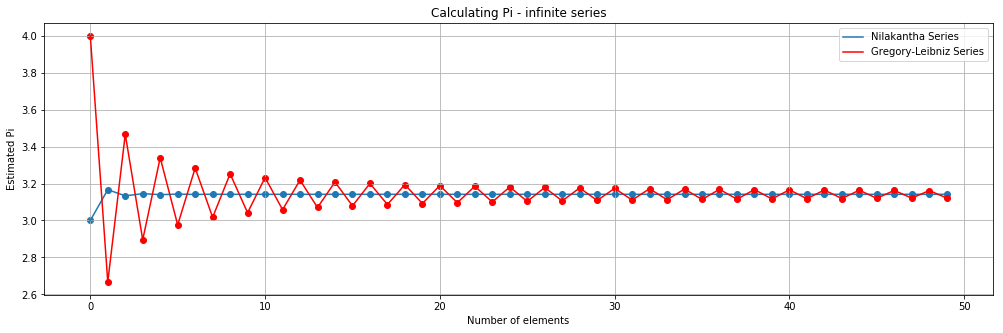

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

series_l_x=[]
series_l_y=[]

series_n_x=[]
series_n_y=[]

step = 0
series_l_x.append(step)
series_n_x.append(step)

ans = 3
series_n_y.append(ans)
j = 2

ans1 = 4
series_l_y.append(ans1)
j1 = 3
for step in range(1,50):
    series_l_x.append(step)
    series_n_x.append(step)
    if step % 2 == 1:
        ans += 4.0 / (j * (j + 1) * (j + 2))
        ans1 -= 4.0 / j1
    else:
        ans -= 4.0 / (j * (j + 1) * (j + 2))
        ans1 += 4.0 / j1
    ans=round(ans,15)
    ans1=round(ans1,15)
    series_n_y.append(ans)
    series_l_y.append(ans1)
    j += 2 
    j1 += 2


fig = plt.figure(figsize=(17,5))  

plt.scatter(series_n_x,series_n_y)
plt.plot(series_n_x,series_n_y,label='Nilakantha Series')

plt.scatter(series_l_x,series_l_y, color="r")
plt.plot(series_l_x,series_l_y,color="r", label="Gregory-Leibniz Series")
plt.title("Calculating Pi - infinite series")
plt.ylabel('Estimated Pi')
plt.xlabel('Number of elements')
plt.grid()
plt.legend()
plt.show()

<img style="float: right;" src="images/Peter.png" width="500"/>

[**Calculating Pi**](https://www.piday.org/pi-facts/)
  
      
         
             
               
               
- [Ludolph van Ceulen](http://www.mathscareers.org.uk/article/celebrating-pi-day-ludolph-van-ceulen/) produced a **35 digit** approximation of Pi and took 25 years of calculations which were done by hand. Ludolph’s achievement was so great that when he died, his upper and lower bounds for Pi were inscribed on his tombstone.
   

- By 1665, Isaac Newton calculated pi to **16 decimal places**. 
   

- It was in the early 1700s that Thomas Lagney calculated **127 decimal places** of pi reaching a new record. 
  

- In the second half of the twentieth century, the number of digits of pi increased from about 2000 to **500,000**. 
  
 
- This record was broken  in 2017 when a Swiss scientist Peter Trueb computed more than **22 trillion digits** of pi which took more than a hundred days(https://pi2e.ch).

Image source - https://www.nzz.ch/wissenschaft/video-serie-nerdzz-der-wahrscheinlich-laengste-rekord-der-welt-ld.152445

### Calculating Pi with darts

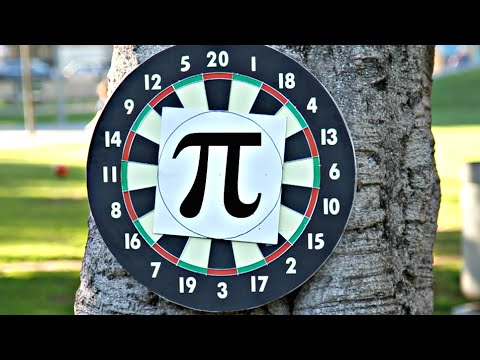

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('M34TO71SKGk')


**Idea**:  
Throwing darts at target - square with side 1 and circle inside of the square the diameter 1.
Number of darts that land in the circle divided the number of darts in the entire square should be proportional to the area of the circle divided by the area of the square:
$$\frac{n \mspace{3mu} circle}{n \mspace{3mu} square}\propto\frac{A \mspace{3mu} circle}{A \mspace{3mu} square}$$


Area of the square is 1 (side is 1). Area of the circle is $\pi\times r^{2}$, where $r$ - is radius 0.5:
$$\frac{n \mspace{3mu} circle}{n \mspace{3mu} square}\propto\pi\times r^{2}=\pi\times 0.5^{2}=\frac{\pi}{4}$$

So we can get pi by multiplying both parts by 4:

$$\pi\approx\frac{n \mspace{3mu} circle}{n \mspace{3mu} square}\times4$$

**Try it yourself!**

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

circle_centerx=0.5
circle_centery=0.5
circle_radius=0.5

darts_number=widgets.IntText(value=0,disabled=False)
submit_button3=widgets.Button(description='Throw',button_style='info',disabled=False)
reset_button3=widgets.Button(description='Restart',disabled=False)
warning3=widgets.HTML(value=" ")

def on_button_submit3_clicked(b):
    global circle_centerx,circle_centery,circle_radius
    x_inside=[]
    y_inside=[]
    x_outside=[]
    y_outside=[]
    if darts_number.value >0:
        if darts_number.value>100000:
            darts_number.value=100000
        warning3.value=""
        for i in range(darts_number.value):
            x=random.random()
            y=random.random()
            if (x-circle_centerx)**2+(y-circle_centery)**2<circle_radius**2:
                x_inside.append(x)
                y_inside.append(y)
            else:
                x_outside.append(x)
                y_outside.append(y)


        circle2 = plt.Circle((circle_centerx, circle_centery), circle_radius,color='b',fill=False)
        fig, ax = plt.subplots(figsize=(10,10)) 

        ax.plot(x_inside,y_inside, 'o', color='y',alpha=0.4)
        ax.plot(x_outside,y_outside, 'o', color='r',alpha=0.4)

        ax.add_artist(circle2)

        plt.ylim(0, 1) 
        plt.xlim(0, 1) 
        plt.show()
        b.disabled=True
        darts_number.disabled=True
        display(Latex("Number of  darts inside the circle: "+str(len(x_inside))))
        display(Latex("Total number of darts: "+str(darts_number.value)))
        display(Latex("Estimated $\pi=\\frac{"+str(len(x_inside))+"}{"+str(darts_number.value)+"}\\times4="+str(len(x_inside)*4/darts_number.value)+"$"))
        display(reset_button3)
    else:
        warning3.value="Please enter number greater than zero"
    
submit_button3.on_click(on_button_submit3_clicked)

def restart_cell(b):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

reset_button3.on_click(restart_cell)

display(Markdown("**Number of darts to throw**(up to 100000):"))
display(widgets.HBox([darts_number,submit_button3]))
display(warning3)

**Number of darts to throw**(up to 100000):

HTML(value=' ')

## [Pi day](https://www.exploratorium.edu/pi/pi-day-history)

<img src="images/PiDay.jpeg" width="600"/>
<center>https://www.exploratorium.edu/pi/pi-day-history</center>

March 14 is Community Pi (π) Day, the annual celebration of a never-ending number—and Albert Einstein’s birthday. How did pi inspire a national holiday and an international celebration thousands of years after its discovery? It all started at tat San Francisco’s Exploratorium with former staff physicist, tinkerer, and media specialist Larry Shaw in 1988.

<center><font size="20" color="INDIANRED">Happy Pi day 2019!</font></center>